In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sc

In [31]:
bd = pd.ExcelFile("Prueba de excel Frubana.xlsx")
print(bd.sheet_names)

['-REGISTRO-', 'INSTRUCCIONES', 'RESULTADOS', 'INPUTS -->', 'BASE DE DATOS', 'CLIENTES YA PAGADOS']


In [32]:
base_datos =bd.parse(4,header=1,index =0)
del(base_datos["Unnamed: 0"])
del(base_datos["Unnamed: 14"])
base_datos.head()

,ID CLIENTE,documento,Nombre del cliente,Direccion,Cantidad de Ordenes,Activo o no,# Ordenes con descuento,# Ordenes sin descuento,VENTAS TOTALES,DESCUENTO,VENTAS SIN DESCUENTO,Nombre del Hunter,Fecha creacion del cliente
0,62yVaS8K49alodEMBsLVaGbtNfs1,1018453699,LA COSTILLITA BBQ,#107-acalle151c#10732,2,,NaN,2,507565.0,NaN,507565.0,Mauricio Acosta,2019-06-01
1,oOjAZ5JuRkQi9WBrYHb269s8Tgw1,94455647,carlos andres leguizamon,#168a-a168a-99carrera74a#168a57,2,,1.0,1,180325.5,59139.0,121186.5,Tatiana Perilla,2019-05-28
2,M4kttsp928bW6OpulFMyDJhEAbg1,1032428726,Dank bier,#47calle95#08,4,ACTIVO,1.0,3,262820.0,96705.0,166115.0,Oscar Vasquez,2019-06-11
3,1bK9ugWh76QslZGL33QnPLoWvVV2,5755852-7,Tienda el tesoro,#7b-a88calle34#7b60barranquillaatlánticocolombia,2,,1.0,1,343191.0,74565.0,268626.0,Jonathan Alvarado,2019-06-21
4,JZDSFWVKcQb3KtptvuhHFEQn8S32,41571222,Restaurante mi rancho,03localc1yc2dg71b#96,1,,NaN,1,84500.0,NaN,84500.0,Liceth Cardoso,2019-06-19


In [33]:
plt.style.use("ggplot")

## PRIMERA OBVESERVACION

In [35]:
mas_ventas =base_datos.groupby("Nombre del Hunter")["VENTAS TOTALES"].sum().sort_values(ascending=False)
display(mas_ventas)
#el Hunter que mas ventas obtuvo fue Yiseth Valera, seguido de Etna Duque y Andres Maury
#Roque yate, Maria alejandra Gomez y Catalina Varinas fueron lo hunters con las ventas mas bajas

Nombre del Hunter
Yiseth Varela            77217340.00
Etna Duque               67058308.50
Andres Maury             63512023.20
Danny Blanco             57597106.53
Elkin Campo              56381460.70
                            ...     
Leider Rodelio             103120.00
Jhonatan Rodriguez          94825.00
Catalina Varinas            76221.00
Maria Alejandra Gomez       71000.01
Roque Yate                  57550.00
Name: VENTAS TOTALES, Length: 96, dtype: float64

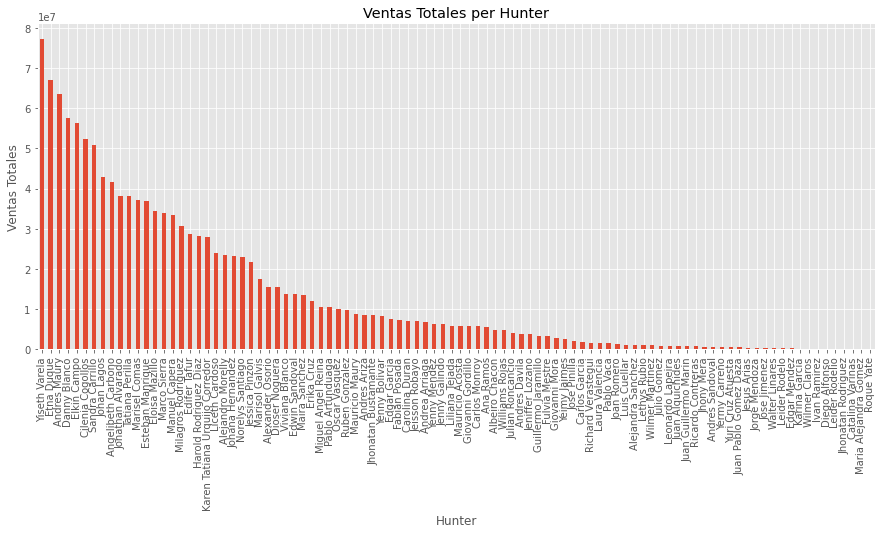

In [39]:
plt.figure(figsize=(15,6))
mas_ventas.plot(x="Nombre del Hunder",y="VENTAS TOTALES",kind="bar")
plt.ylabel("Ventas Totales")
plt.xlabel("Hunter")
plt.title("Ventas Totales per Hunter")
plt.show()

## SEGUNDA OBSERVACION

In [40]:
base_datos.fillna({"DESCUENTO":0},inplace = True)
assert base_datos["DESCUENTO"].isna().sum() == 0

slope: 0.27686161464206005
intercept: 81412.25714451107


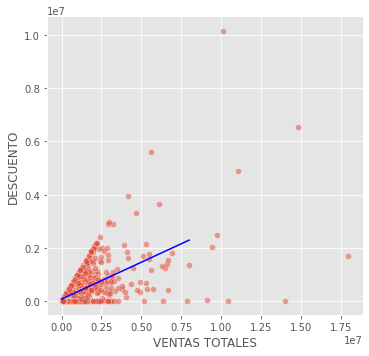

Pearson: 0.63


In [42]:

a,b = np.polyfit(base_datos["VENTAS TOTALES"],base_datos["DESCUENTO"],1)
print("slope:",a)
print("intercept:",b)

x = np.array([0,8000000])
y = a*x+b

sns.relplot(x="VENTAS TOTALES",y="DESCUENTO",data=base_datos,kind="scatter",alpha=0.5)
plt.plot(x,y,color="b")
plt.show()

correlation,pvalue = sc.stats.pearsonr(base_datos["VENTAS TOTALES"],base_datos["DESCUENTO"])
print("Pearson:",round(correlation,2))

In [ ]:
#Existe una relacion entre el descuento aplicado a un cliente y la venta realizada

## TERCERA OBSERVACION

In [49]:
my_2 = base_datos["Nombre del cliente"].value_counts()
my_list = list(base_datos["Nombre del cliente"].value_counts())
mas_dos = 0
for i in my_list:
    if i >= 2:
        mas_dos += 1
print(my_2)
print(" ")
print("Existen {} clientes que han comprado 2 o mas veces".format(mas_dos))

VIVA LA PIZZA                    8
POLLOS CENTURY                   6
COPERACO 100                     5
Cafeteria Bodytech Washington    5
Inversiones Gratin Burger SAS    5
                                ..
Neivayork                        1
malaga sas                       1
Abastos la 8                     1
La pezca milagrosa               1
Medio oriente                    1
Name: Nombre del cliente, Length: 2080, dtype: int64
 
Existen 139 clientes que han comprado 2 o mas veces


In [ ]:
#El cliente mas frecuente es VIVA LA PIZZA, seguido de POLLOS CENTURY y finalmente COPERO 100